Tutorials I have read:
- https://www.tensorflow.org/tutorials/images/classification     (I almost copied everything from this sample)
- https://www.tensorflow.org/tutorials/keras/classification      (I followed how the code adapted the multi categories type and model testing here)
- https://www.tensorflow.org/tutorials/keras/save_and_load       (How to save and load models so you can save your progress and train them tomorrow)
- https://keras.io/api/preprocessing/image/                      (I copied the code snippet where you load an image and convert them into an array)
- https://missinglink.ai/guides/tensorflow/tensorflow-image-classification/ (This site documents how pretty much this code classifies image)
- https://towardsdatascience.com/the-4-convolutional-neural-network-models-that-can-classify-your-fashion-images-9fe7f3e5399d#:~:text=Convolutional%20Neural%20Networks%20(CNNs)%20is,an%20image%20is%20good%20enough. (Training discipline I followed) 
- https://stackoverflow.com/questions/59439128/what-does-class-mode-parameter-in-keras-image-gen-flow-from-directory-signify (Class-modes, oh shit, i made a mistake)
- https://medium.com/@vijayabhaskar96/tutorial-image-classification-with-keras-flow-from-directory-and-generators-95f75ebe5720 (Not used too much but shit, this could be useful)
- https://keras.io/api/preprocessing/image/ (Extra reading about image data generators)

At the point of this writing, the model shows about 40% validation accuracy in prediction, in kaggle, we have 36% of accuracy. It took 3-4 days to train the used model 

In [1]:
#Prerequisites

#if you have an outdated numpy and tensorflow

#pip uninstall tensorflow
#pip uninstall numpy

In [2]:
#Installation

#pip install tensorflow   #(the most recent)
#pip install numpy

**IMPORT MODULES**

In [1]:
import tensorflow as tf

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras

import os
import numpy as np
import matplotlib.pyplot as plt

In [28]:
from tensorflow.keras.applications import MobileNet

This is the part where we load a premade model training architecture. Feel free to look at keras' documentation for more architectures like MobileNet, Inception, ResNet, etc.

**LOAD DATA**

In [3]:
trainDir = 'samples_train/'
testDir = 'samples_test/'

In [4]:
categoryTrainDir = [(trainDir + i + '/') for i in os.listdir(trainDir)]
categoryTestDir = [(testDir + i + '/') for i in os.listdir(trainDir)]

**ANALYZE DATA**

In [5]:
categoryTrainCount = [len(os.listdir(categ)) for categ in categoryTrainDir]
categoryTestCount = [len(os.listdir(categ)) for categ in categoryTestDir]

In [6]:
for categ in range(42):
    print('total {0} images| training: {1} | test: {2}'.\
          format(categ, categoryTrainCount[categ], categoryTestCount[categ]))
    
print()

totalTrainImages = 0
totalTestImages = 0

for i in categoryTrainCount: totalTrainImages += i
for i in categoryTestCount: totalTestImages += i
    
print('total images| training: {1} | test: {2}'.\
          format(categ, totalTrainImages, totalTestImages))

total 0 images| training: 776 | test: 210
total 1 images| training: 753 | test: 200
total 2 images| training: 754 | test: 212
total 3 images| training: 750 | test: 210
total 4 images| training: 751 | test: 215
total 5 images| training: 747 | test: 206
total 6 images| training: 756 | test: 218
total 7 images| training: 772 | test: 212
total 8 images| training: 775 | test: 209
total 9 images| training: 770 | test: 208
total 10 images| training: 735 | test: 208
total 11 images| training: 667 | test: 206
total 12 images| training: 770 | test: 204
total 13 images| training: 763 | test: 209
total 14 images| training: 761 | test: 211
total 15 images| training: 749 | test: 199
total 16 images| training: 762 | test: 207
total 17 images| training: 618 | test: 213
total 18 images| training: 707 | test: 200
total 19 images| training: 779 | test: 206
total 20 images| training: 764 | test: 211
total 21 images| training: 733 | test: 216
total 22 images| training: 752 | test: 208
total 23 images| trai

**PRESET VARIABLES**

In [46]:
batch_size = 64
IMG_HEIGHT = 150
IMG_WIDTH = 150

In [25]:
#Because the computer can't process all our sample images all at once, we use batch sizes to process our images.
#Img width and img height resizes our image automatically to a lower more processible tensors

In [9]:
classifications = ['women_clothes','women_sleeves','women_shirt','women_jacket','women_pants','rings','earrings','cap','wallet','bag','cellphone_case','cellphone','clock',
'bottle','rice_cooker','coffee','women_shoes','women_heels','eletronics','flash_drive','chair','tennis','bikingw','gloves','watchw','belt','earphones','toy_car','men_jacket','men_pants',
'men_shoes','snack','sanitary','alcohol','facial','perfume','bucket','laptop','bowl','pot','hose','sofa']

**DATA PREPARATION**

In [10]:
train_image_generator = ImageDataGenerator(rescale=1./255) 
# Generator for our training data

validation_image_generator = ImageDataGenerator(rescale=1./255) 
#Generator for our validation data

In [11]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=batch_size,
                                                           directory=trainDir,
                                                           shuffle=True,
                                                           target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                           class_mode='sparse')

Found 30856 images belonging to 42 classes.


In [12]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=batch_size,
                                                              directory=testDir,
                                                              target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                              class_mode='sparse')

Found 8735 images belonging to 42 classes.


**VISUALIZE TRAINING IMAGES**

In [13]:
sampleImg,_ = next(train_data_gen)

In [14]:
def rescaleImgColor(img):
    
    new_img = img.copy()
    
    for i in range(len(new_img)):
        new_img[i] /= 255.
        
    return new_img

In [15]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        rescaledImg = rescaleImgColor(img)
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

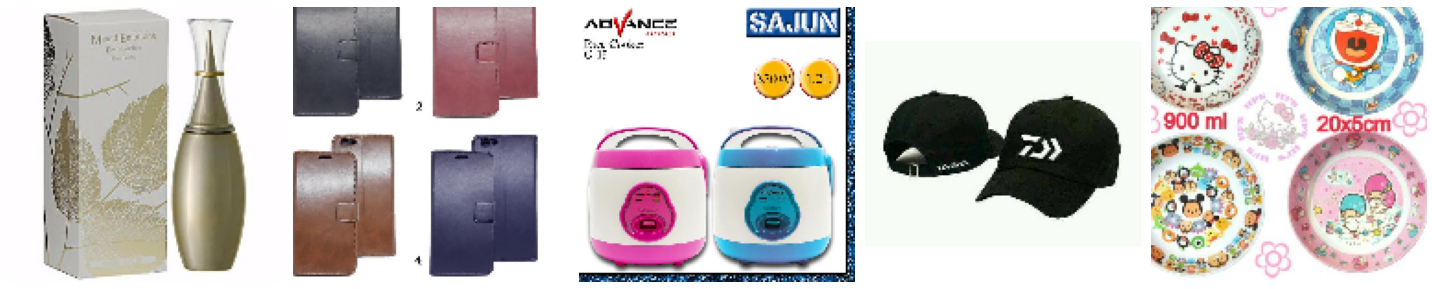

In [16]:
plotImages(sampleImg[:5])

**CREATING THE MODEL**

In [40]:
model = MobileNet(
    input_shape=(IMG_HEIGHT, IMG_WIDTH, 3),
    weights = None,
    classes=42, classifier_activation='softmax'
)

In [41]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [42]:
model.summary()

Model: "mobilenet_1.00_150"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 151, 151, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 75, 75, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 75, 75, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 75, 75, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 75, 75, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 75, 75, 32) 

**SET UP THE MODEL SAVER**

In [35]:
checkpoint_path = "training_mb/cp.ckpt"
#checkpoint_path = "training_2/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

In [36]:
# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1,
                                                 save_freq=(totalTrainImages // batch_size)*2
                                                )

**TRAIN THE MODEL**

- In this sectopn, you train the model without any data augmentation. Most of the time, learning this way yields pseudo-accurate and fast model learning.
- For my first model training, I run this traning for 10 epochs.
- After training here once, go past this part.
- After about 6 epochs, the model should yeild 99% accuracy, but it is far from the truth. Based on my experience, it only predicts about 30 to 40% of images right

In [43]:
epochs = 10
#This is the amount of rotation the training will go through

In [ ]:
#UNCOMMENT THIS IF YOU ALREADY STARTED TRAINING. THIS LOADS YOUR PREVIOUSLY TRAINED MODEL

model.load_weights(checkpoint_path)

In [ ]:
 history = model.fit(
    train_data_gen,
    steps_per_epoch=totalTrainImages // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=totalTestImages // batch_size,
    callbacks=[cp_callback]
)

**Beware:** The activity aboe is very cpu intensive. Expect very slow training rate

**TRAIN THE MODEL WITH DATA AUGMENTATION**

- After training for 10 epochs without data augmentation. Run this part of code.
- In this training method, the images was distorted in order for the model to be more versatile with image recognition
- On the tutorial I had read, the author trained his model 60 epochs using this method

In [28]:
image_gen_train2 = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    ) 

In [29]:
 train_data_gen = image_gen_train2.flow_from_directory(batch_size=batch_size,
                                                     directory=trainDir,
                                                     shuffle=True,
                                                     target_size=(IMG_HEIGHT, IMG_WIDTH),
                                                     class_mode='sparse')

Found 30856 images belonging to 42 classes.


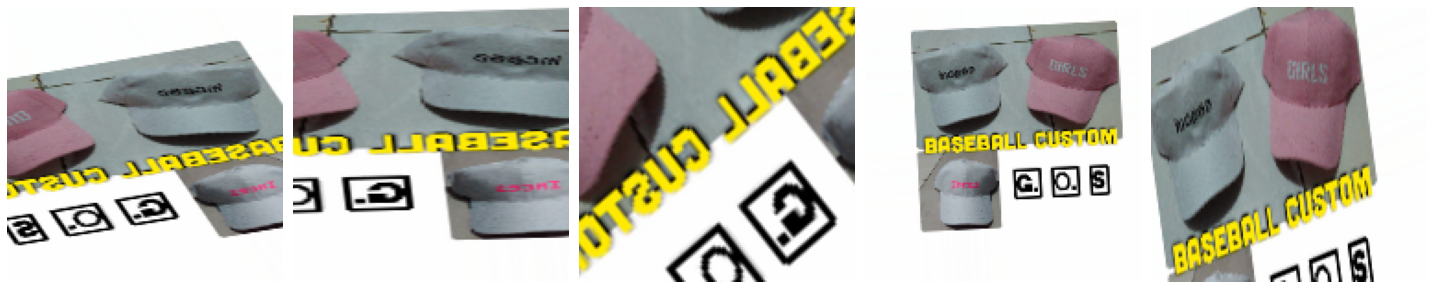

In [89]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [30]:
epochs = 10

In [23]:
#UNCOMMENT THIS IF YOU ALREADY STARTED TRAINING. THIS LOADS YOUR PREVIOUSLY TRAINED MODEL

model.load_weights(checkpoint_path)

In [31]:
history = model.fit(
    train_data_gen,
    steps_per_epoch=totalTrainImages // batch_size,
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=totalTestImages // batch_size,
    callbacks=[cp_callback]
)

Epoch 1/10
241/241 [==============================] - 793s 3s/step - loss: 2.2449 - accuracy: 0.3856 - val_loss: 2.5544 - val_accuracy: 0.3745
Epoch 2/10
240/241 [============================>.] - ETA: 2s - loss: 2.2170 - accuracy: 0.3936
Epoch 00002: saving model to training_default/cp.ckpt
241/241 [==============================] - 788s 3s/step - loss: 2.2159 - accuracy: 0.3938 - val_loss: 2.5553 - val_accuracy: 0.3706
Epoch 3/10
241/241 [==============================] - 775s 3s/step - loss: 2.2107 - accuracy: 0.3969 - val_loss: 2.7138 - val_accuracy: 0.3527
Epoch 4/10
240/241 [============================>.] - ETA: 2s - loss: 2.1921 - accuracy: 0.3971
Epoch 00004: saving model to training_default/cp.ckpt
241/241 [==============================] - 747s 3s/step - loss: 2.1916 - accuracy: 0.3973 - val_loss: 2.5610 - val_accuracy: 0.3719
Epoch 5/10
241/241 [==============================] - 581s 2s/step - loss: 2.1780 - accuracy: 0.4024 - val_loss: 2.6118 - val_accuracy: 0.3551
Epoch 6

As you can see, the growth in this training is linear with an almost flat slope (meaning, it learns very slowly). You should look at the 'val_accuracy' instead of the 'accuracy' alone.

My theory is that the model architecture is not effective enough. We might be just overfitting our model by this point, (our model might not be more accurate at this point because of our poor model training architecture) 

**VISUALIZE TRAINING RESULTS**

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

**TEST MODEL - Make Predictions**

In [24]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

Load the model that you will use for prediction

In [25]:
from PIL import Image

def rescale_images(directory, size):
    for img in os.listdir(directory):
        im = Image.open(directory+img)
        im_resized = im.resize(size, Image.ANTIALIAS)
        im_resized.save(directory+img)

It is important to resize the image into what the model is trained to, in this case 125 by 125. This function^ resizes all the images inside a directory

In [26]:
def plotImagesSingle(img):
    plt.imshow(img)

In [27]:
def classifyImg(img):
    image = keras.preprocessing.image.load_img(img)
    
    input_arr = keras.preprocessing.image.img_to_array(image)
    
    rescaledImg = rescaleImgColor(input_arr)
    plotImagesSingle(rescaledImg)
    
    input_arr = np.array([rescaledImg])  # Convert single image to a batch.
    
    predictions = model.predict(input_arr)
    
    retu = np.argmax(predictions)
    
    return retu

^ Classify an image you will provide through a directory. 
- First, load the image by using the preloaded keras imager loader
- Then, convert the image into a processable array
- Rescale the rgb array [0-255] to [0.0-1.0]. This is a self written code as 'plotImagesSingle'
- Classify the loaded and processed image using the model
- Using numpy's argmax, return the class with highest probability

In [83]:
img2Prc = '0dfb9928e0be21246fc83702212db7b9.jpg'

'women_pants'

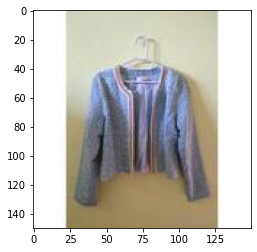

In [84]:
classifications[classifyImg(img2Prc)]

Classifications is an array that contains the list of all category names. ClassifyImg returns the predicted classification of the provided image (img2Prc)

In [85]:
target_folder = 'samples_test/05/'

gloves
rings
earrings
women_heels
men_pants
hose
facial
coffee
cap
bowl
pot
rings
earphones
rings
rings
rings
rings
rice_cooker
earrings
women_heels
rings
watchw
rings
bottle
wallet
rings
women_heels
rings
pot
toy_car
rice_cooker
gloves
sofa
gloves
perfume
earrings
bottle
rings
rings
women_heels
gloves
rings
cellphone_case
alcohol
rings
rings
laptop
rings
bikingw
rings
rings
rings
rings
hose
pot
rings
rings
rice_cooker
women_sleeves
rings
bucket
cellphone
women_jacket
toy_car
bottle
pot
pot
rings
rings
rings
rings
earrings
facial
cellphone
rings
rings
facial
rings
hose
women_clothes
rings
women_shoes
rings
hose
rings
earphones
facial
rings
rings
rings
toy_car
cap
bag
rice_cooker
rings
women_heels
pot
women_shoes
rings
sofa
rings
men_jacket
sofa
earrings
sofa
coffee
coffee
cap
rings
wallet
snack
rings
rings
tennis
rings
rings
hose
rings
sanitary
belt
watchw
rice_cooker
bottle
women_heels
rings
sofa
rings
chair
rings
rings
facial
rings
women_shoes
rings
rings
rice_cooker
rings
laptop
rin

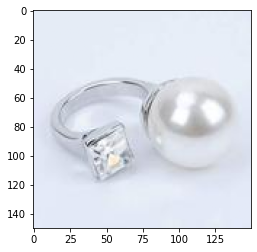

In [86]:
rescale_images(target_folder, (IMG_HEIGHT, IMG_WIDTH))

for i in os.listdir(target_folder):
    print(classifications[classifyImg(target_folder + i)])

^Assuming that all images in the folder is not 150x150 in size, we need to resize them.

^^ For all items in the directory list, predict their category

**CREATING THE CSV TO SEND AT KAGGLE**

In [33]:
import pandas as pd

In [34]:
contestTrainDir = 'test/'

In [35]:
toTestRaw = pd.read_csv('test.csv')

In [36]:
toTest = toTestRaw['filename'].tolist()
len(toTest)

12186

In [37]:
toTestPreditions = list()

In [39]:
def generatePredictions(toTest, targetFolder):
    toReturn = list()
    
    print('Resizing Images...')
    rescale_images(targetFolder, (IMG_HEIGHT, IMG_WIDTH))
    
    print('Predicting Images...')
    for item in toTest:
        toReturn.append(classifyImg(targetFolder + item))
        if len(toReturn) % 1000 == 0: print('Done predicting ', len(toReturn) , ' images') 
        
    return toReturn

Resizing Images...
Predicting Images...
Done predicting  1000  images
Done predicting  2000  images
Done predicting  3000  images
Done predicting  4000  images
Done predicting  5000  images
Done predicting  6000  images
Done predicting  7000  images
Done predicting  8000  images
Done predicting  9000  images
Done predicting  10000  images
Done predicting  11000  images
Done predicting  12000  images


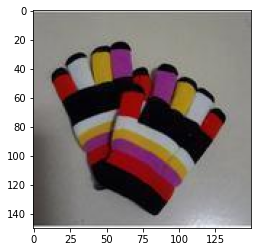

In [40]:
toTestPreditions = generatePredictions(toTest, contestTrainDir)

In [41]:
toSave = pd.DataFrame()

In [42]:
print('Test: ', len(toTest))
print('Predictions: ', len(toTestPreditions))

Test:  12186
Predictions:  12186


In [43]:
toSave['filename'] = toTest

In [44]:
toSave['category'] = toTestPreditions

In [45]:
toSave['category'] = toSave['category'].apply(lambda x: '0'+str(x) if (x<10)  else str(x))

In [46]:
toSave

,filename,category
0,fd663cf2b6e1d7b02938c6aaae0a32d2.jpg,41
1,c7fd77508a8c355eaab0d4e10efd6b15.jpg,40
2,127f3e6d6e3491b2459812353f33a913.jpg,29
3,5ca4f2da11eda083064e6c36f37eeb81.jpg,37
4,46d681a542f2c71be017eef6aae23313.jpg,12
...,...,...
12181,5ba958eacb23cd7d1673bad4dae55784.jpg,16
12182,efbe41a1c2b666b70e337e438559808b.jpg,12
12183,79fdaa5ac5ba10dbe8004cabd8c35eb3.jpg,13
12184,ac3d136124617637a05ba66694e381ef.jpg,15


In [47]:
toSave.to_csv('submissionFile.csv', index=False)